In [1]:
import pickle
import numpy as np
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import mlab
import seaborn as sns
%matplotlib inline


mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_base_CDS = pd.read_csv('SDfigure.csv')
df_base_CDS = df_base_CDS.loc[:,~df_base_CDS.columns.str.contains('^Unnamed')]
df_base_CDS['negative_SD_aSD']=df_base_CDS['SD_aSD']*-1
df_base_CDS

,gene,ks57_reads,ks57_rpc,ks57_rpkm,ks58_reads,ks58_rpc,ks58_rpkm,ks59_reads,ks59_rpc,ks59_rpkm,...,Zhang_mmc2_Gini_6hr,Zhang_mmc2_TE_30min,Zhang_mmc2_TE_6hr,Zhang_mmc2_Filter_vivo,Zhang_mmc2_Gini_vitro,Zhang_mmc2_Gini_ksg,Zhang_mmc2_Filter_vitro_ksg,Shape_median,Shape_seq,negative_SD_aSD
0,aaaD,3.0,0.029126,2.921452,2.0,0.019417,2.100146,2.0,0.019417,1.054992,...,0.940,NaN,NaN,NO,0.926,0.987,NO,NaN,NaN,5.184330
1,aaaE,7.0,0.018519,1.857466,1.0,0.002646,0.286131,3.0,0.007937,0.431207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.724650
2,aaeA,2.0,0.006431,0.645037,1.0,0.003215,0.347773,7.0,0.022508,1.222909,...,0.782,0.000,1.698,NO,0.815,0.929,NO,NaN,NaN,4.107930
3,aaeB,3.0,0.004573,0.458704,3.0,0.004573,0.494623,8.0,0.012195,0.662587,...,0.772,0.000,0.000,NO,0.825,0.934,NO,NaN,NaN,1.523445
4,aaeR,76.0,0.245161,24.590456,81.0,0.261290,28.260511,88.0,0.283871,15.423305,...,0.676,0.390,0.638,NO,0.705,0.835,NO,NaN,NaN,0.359835
5,aaeX,2.0,0.029412,2.950093,0.0,0.000000,0.000000,4.0,0.058824,3.196006,...,0.884,0.318,2.095,NO,0.819,0.947,NO,NaN,NaN,1.747805
6,aas,165.0,0.229167,22.986145,158.0,0.219444,23.734565,235.0,0.326389,17.733393,...,0.617,0.390,1.771,NO,0.671,0.799,NO,NaN,NaN,5.931100
7,aat,50.0,0.212766,21.341101,38.0,0.161702,17.489299,49.0,0.208511,11.328820,...,0.695,0.091,0.287,NO,0.657,0.805,NO,NaN,NaN,3.607930
8,abgA,4.0,0.009153,0.918107,4.0,0.009153,0.990000,19.0,0.043478,2.362265,...,0.915,0.000,0.000,NO,0.970,0.985,NO,NaN,NaN,3.656165
9,abgB,6.0,0.012448,1.248587,8.0,0.016598,1.795145,5.0,0.010373,0.563611,...,0.942,0.000,0.000,NO,0.965,0.985,NO,NaN,NaN,5.395080


In [4]:
def DFtoUSE(df,rpc_threshfold,Normal_RP,MS2_RP,RNAseq):
    RP_include = df_base_CDS['gene'].isin(df_base_CDS['gene'])  
    MS2_include = RP_include 
    RNA_include = RP_include 
    if Normal_RP != 'no':
        RP_include = df_base_CDS[Normal_RP+'_rpc'] > rpc_threshfold
    if MS2_RP != 'no':
        MS2_include = df_base_CDS[MS2_RP+'_rpc'] > rpc_threshfold
    if RNAseq != 'no':
        RNA_include = df_base_CDS[RNAseq+'_rpc'] > rpc_threshfold
    df_to_use = df[RP_include & MS2_include & RNA_include]
    return df_to_use

0.43109938931576464
2217


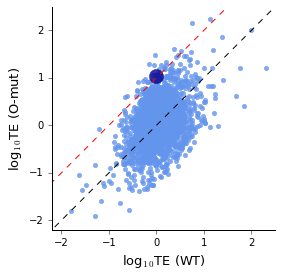

In [5]:
base_Normal_RP = 'ks57'
base_MS2_RP = 'ks61'
base_RNAseq = 'ks65'
Normal_RP = 'ks58'
MS2_RP = 'ks62'
RNAseq = 'ks66'
dotcolor='cornflowerblue'
rpc_threshfold = 0.05

df_basecutoff = DFtoUSE(df_base_CDS,rpc_threshfold,base_Normal_RP,base_MS2_RP,base_RNAseq)
df_to_use = DFtoUSE(df_basecutoff,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)
CSPs = ['hemA']
csps = df_to_use['gene'].isin(CSPs)

print df_to_use['TE_'+base_MS2_RP+'/'+base_RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan).corr(df_to_use['TE_'+MS2_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan))
print len(df_to_use)

fig, ax = plt.subplots()
fig.set_size_inches(4, 4) 

ax = sns.regplot(x=df_to_use['TE_'+base_MS2_RP+'/'+base_RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 y=df_to_use['TE_'+MS2_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 fit_reg=False,
                 color=dotcolor)

ax = sns.regplot(x=df_to_use[csps]['TE_'+base_MS2_RP+'/'+base_RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 y=df_to_use[csps]['TE_'+MS2_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 fit_reg=False,
                 color='darkblue',
                scatter_kws={'s': 200})

ax.set_xlim(-2.2,2.5)
ax.set_ylim(-2.2,2.5)
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])

plt.xlabel('log'+'$_1$'+'$_0$'+'TE (WT)', fontsize=13)
plt.ylabel('log'+'$_1$'+'$_0$'+'TE (O-mut)', fontsize=13)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

x = np.linspace(-5,5,100)
plt.plot(x, x, '--',color='black')
plt.plot(x, x+1, '--r')


In [29]:
def linearity_SDASD(df_to_use,profiling,RNAseq):
    print df_to_use['negative_SD_aSD'].corr(df_to_use['TE_'+profiling+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan))

def plot_SDASD(df_to_use,profiling,RNAseq,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks):                                    
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4) 

    x_data = df_to_use['negative_SD_aSD']
    y_data = df_to_use['TE_'+profiling+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan)
    ax = sns.regplot(x=x_data,y=y_data,fit_reg=False, color=dotcolor)

    ax.set_xlim(x_lim_left,x_lim_right)
    ax.set_ylim(y_lim_bottom,y_lim_top)
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    plt.xlabel('-'+'$\Delta$'+'G (toward WT aSD)', fontsize=13)
    plt.ylabel('log'+'$_1$'+'$_0$'+'TE', fontsize=13)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    sns.despine()
    
def plot_SDASD_deltaTE(df_to_use,mut,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks):                                    
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4) 
    
    x_data = df_to_use['negative_SD_aSD']
    y_data = df_to_use['FD_TE_wt/'+mut].apply(np.log10).replace([np.inf,-np.inf],np.nan)
    ax = sns.regplot(x=x_data,y=y_data,fit_reg=False, color=dotcolor)
    
    ax.set_xlim(x_lim_left,x_lim_right)
    ax.set_ylim(y_lim_bottom,y_lim_top)
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    plt.xlabel('-'+'$\Delta$'+'G (toward WT aSD)', fontsize=13)
    plt.ylabel('$\Delta$'+'log'+'$_1$'+'$_0$'+'TE', fontsize=13)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    sns.despine()
    
def plot_SDASD_deltaRPKM(df_to_use,Normal_RP,MS2_RP,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks):                                    
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4) 
    
    x_data = df_to_use['negative_SD_aSD']
    y_data = df_to_use['FD_RP_'+Normal_RP+'/'+MS2_RP].apply(np.log10).replace([np.inf,-np.inf],np.nan)
    ax = sns.regplot(x=x_data,y=y_data,fit_reg=False, color=dotcolor)
    
    ax.set_xlim(x_lim_left,x_lim_right)
    ax.set_ylim(y_lim_bottom,y_lim_top)
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    plt.xlabel('-'+'$\Delta$'+'G (toward WT aSD)', fontsize=13)
    plt.ylabel('$\Delta$'+'log'+'$_1$'+'$_0$'+'RPKM', fontsize=13)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    sns.despine()

0.10974228599750724


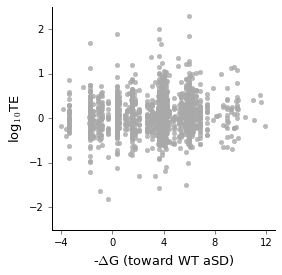

In [55]:
Normal_RP = 'no'
MS2_RP = 'ks61'
RNAseq = 'ks65'
dotcolor='darkgrey'
rpc_threshfold = 0.1

profiling = MS2_RP
x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -2.5
y_lim_top = 2.5
x_ticks = [-4,0,4,8,12]
y_ticks = [-2,-1,0,1,2]

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)
linearity_SDASD(df_to_use,profiling,RNAseq)
plot_SDASD(df_to_use,profiling,RNAseq,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)

-0.394559853610305


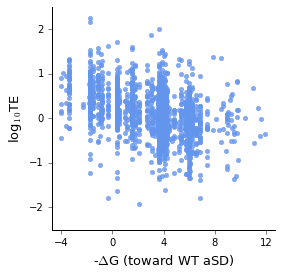

In [22]:
Normal_RP = 'no'
MS2_RP = 'ks62'
RNAseq = 'ks66'
dotcolor='cornflowerblue'
rpc_threshfold = 0.1

profiling = MS2_RP
x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -2.5
y_lim_top = 2.5
x_ticks = [-4,0,4,8,12]
y_ticks = [-2,-1,0,1,2]

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)
linearity_SDASD(df_to_use,profiling,RNAseq)
plot_SDASD(df_to_use,profiling,RNAseq,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)

-0.38736454429523204


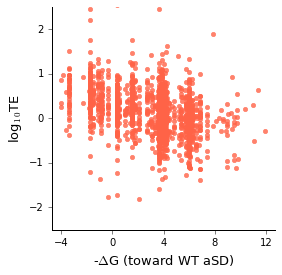

In [23]:
Normal_RP = 'no'
MS2_RP = 'ks63'
RNAseq = 'ks67'
dotcolor='tomato'
rpc_threshfold = 0.1

profiling = MS2_RP
x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -2.5
y_lim_top = 2.5
x_ticks = [-4,0,4,8,12]
y_ticks = [-2,-1,0,1,2]

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)
linearity_SDASD(df_to_use,profiling,RNAseq)
plot_SDASD(df_to_use,profiling,RNAseq,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)

-0.49818941250878895


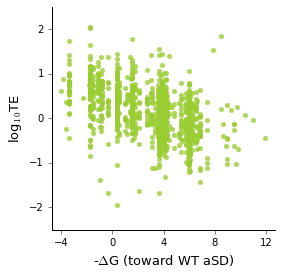

In [24]:
Normal_RP = 'no'
MS2_RP = 'ks64'
RNAseq = 'ks68'
dotcolor='yellowgreen'
rpc_threshfold = 0.1

profiling = MS2_RP
x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -2.5
y_lim_top = 2.5
x_ticks = [-4,0,4,8,12]
y_ticks = [-2,-1,0,1,2]

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)
linearity_SDASD(df_to_use,profiling,RNAseq)
plot_SDASD(df_to_use,profiling,RNAseq,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)

0.5189026153631643


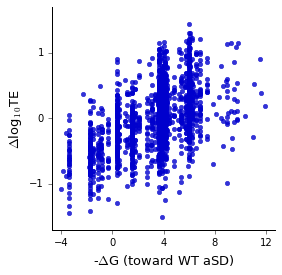

In [26]:
base_Normal_RP = 'no'
base_MS2_RP = 'ks61'
base_RNAseq = 'ks65'
Normal_RP = 'no'
MS2_RP = 'ks62'
RNAseq = 'ks66'
mut='O'
dotcolor='mediumblue'
rpc_threshfold = 0.1

x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -1.7
y_lim_top = 1.7
x_ticks = [-4,0,4,8,12]
y_ticks = [-1,0,1]

df_basecutoff = DFtoUSE(df_base_CDS,rpc_threshfold,base_Normal_RP,base_MS2_RP,base_RNAseq)
df_to_use = DFtoUSE(df_basecutoff,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['negative_SD_aSD'].corr(df_to_use['FD_TE_wt/'+mut].apply(np.log10).replace([np.inf,-np.inf],np.nan))

plot_SDASD_deltaTE(df_to_use,mut,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)

0.5061184400568823


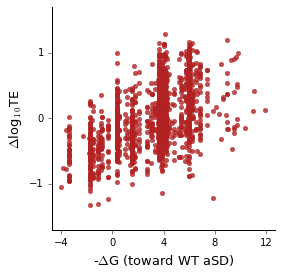

In [27]:
base_Normal_RP = 'no'
base_MS2_RP = 'ks61'
base_RNAseq = 'ks65'
Normal_RP = 'no'
MS2_RP = 'ks63'
RNAseq = 'ks67'
mut='S'
dotcolor='firebrick'
rpc_threshfold = 0.1

x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -1.7
y_lim_top = 1.7
x_ticks = [-4,0,4,8,12]
y_ticks = [-1,0,1]

df_basecutoff = DFtoUSE(df_base_CDS,rpc_threshfold,base_Normal_RP,base_MS2_RP,base_RNAseq)
df_to_use = DFtoUSE(df_basecutoff,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['negative_SD_aSD'].corr(df_to_use['FD_TE_wt/'+mut].apply(np.log10).replace([np.inf,-np.inf],np.nan))

plot_SDASD_deltaTE(df_to_use,mut,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)

0.6853287108519752


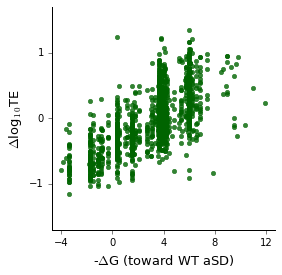

In [28]:
base_Normal_RP = 'no'
base_MS2_RP = 'ks61'
base_RNAseq = 'ks65'
Normal_RP = 'no'
MS2_RP = 'ks64'
RNAseq = 'ks68'
mut='A'
dotcolor='darkgreen'
rpc_threshfold = 0.1

x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -1.7
y_lim_top = 1.7
x_ticks = [-4,0,4,8,12]
y_ticks = [-1,0,1]

df_basecutoff = DFtoUSE(df_base_CDS,rpc_threshfold,base_Normal_RP,base_MS2_RP,base_RNAseq)
df_to_use = DFtoUSE(df_basecutoff,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['negative_SD_aSD'].corr(df_to_use['FD_TE_wt/'+mut].apply(np.log10).replace([np.inf,-np.inf],np.nan))

plot_SDASD_deltaTE(df_to_use,mut,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)

# Stresses

0.6464141780918352


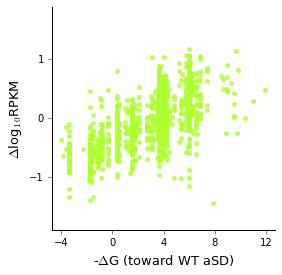

In [44]:
Normal_RP = 'ks60'
MS2_RP = 'ks64'
RNAseq = 'no'
dotcolor='greenyellow'
rpc_threshfold = 0.1

x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -1.9
y_lim_top = 1.9
x_ticks = [-4,0,4,8,12]
y_ticks = [-1,0,1]

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['negative_SD_aSD'].corr(df_to_use['FD_RP_'+Normal_RP+'/'+MS2_RP].apply(np.log10).replace([np.inf,-np.inf],np.nan))

plot_SDASD_deltaRPKM(df_to_use,Normal_RP,MS2_RP,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)                                  

0.10039913417514197


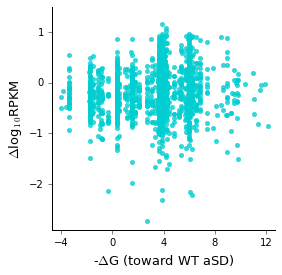

In [33]:
Normal_RP = 'ks168'
MS2_RP = 'ks176ks159'
RNAseq = 'no'
dotcolor='darkturquoise'
rpc_threshfold = 0.1

x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -2.9
y_lim_top = 1.5
x_ticks = [-4,0,4,8,12]
y_ticks = [-2,-1,0,1]

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['negative_SD_aSD'].corr(df_to_use['FD_RP_'+Normal_RP+'/'+MS2_RP].apply(np.log10).replace([np.inf,-np.inf],np.nan))

plot_SDASD_deltaRPKM(df_to_use,Normal_RP,MS2_RP,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)                                  

0.2325435140415749


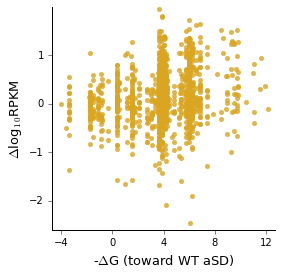

In [34]:
Normal_RP = 'ks180ks169'
MS2_RP = 'ks181ks160'
RNAseq = 'no'
dotcolor='goldenrod'
rpc_threshfold = 0.1

x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -2.6
y_lim_top = 2.0
x_ticks = [-4,0,4,8,12]
y_ticks = [-2,-1,0,1]

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['negative_SD_aSD'].corr(df_to_use['FD_RP_'+Normal_RP+'/'+MS2_RP].apply(np.log10).replace([np.inf,-np.inf],np.nan))

plot_SDASD_deltaRPKM(df_to_use,Normal_RP,MS2_RP,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)                                  

0.08176873799909183


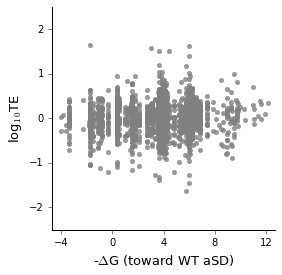

In [37]:
Normal_RP = 'ks57'
MS2_RP = 'no'
RNAseq = 'ks65'
dotcolor='grey'
rpc_threshfold = 0.1

x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -2.5
y_lim_top = 2.5
x_ticks = [-4,0,4,8,12]
y_ticks = [-2,-1,0,1,2]

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['negative_SD_aSD'].corr(df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan))

profiling = Normal_RP
plot_SDASD(df_to_use,profiling,RNAseq,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)

0.07805844886590659


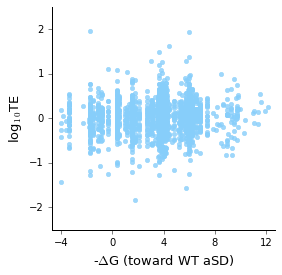

In [38]:
Normal_RP = 'ks58'
MS2_RP = 'no'
RNAseq = 'ks66'
dotcolor='lightskyblue'
rpc_threshfold = 0.1

x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -2.5
y_lim_top = 2.5
x_ticks = [-4,0,4,8,12]
y_ticks = [-2,-1,0,1,2]

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['negative_SD_aSD'].corr(df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan))

profiling = Normal_RP
plot_SDASD(df_to_use,profiling,RNAseq,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)

0.10693901500694153


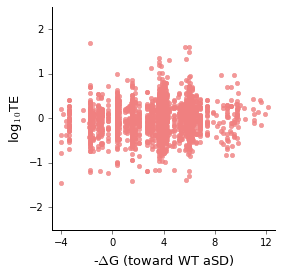

In [40]:
Normal_RP = 'ks59'
MS2_RP = 'no'
RNAseq = 'ks67'
dotcolor='lightcoral'
rpc_threshfold = 0.1

x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -2.5
y_lim_top = 2.5
x_ticks = [-4,0,4,8,12]
y_ticks = [-2,-1,0,1,2]

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['negative_SD_aSD'].corr(df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan))

profiling = Normal_RP
plot_SDASD(df_to_use,profiling,RNAseq,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)

0.06824235579638616


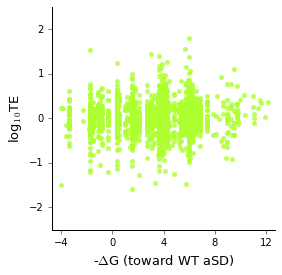

In [41]:
Normal_RP = 'ks60'
MS2_RP = 'no'
RNAseq = 'ks68'
dotcolor='greenyellow'
rpc_threshfold = 0.1

x_lim_left = -4.7
x_lim_right = 12.7
y_lim_bottom = -2.5
y_lim_top = 2.5
x_ticks = [-4,0,4,8,12]
y_ticks = [-2,-1,0,1,2]

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['negative_SD_aSD'].corr(df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan))

profiling = Normal_RP
plot_SDASD(df_to_use,profiling,RNAseq,x_lim_left,x_lim_right,y_lim_bottom,y_lim_top,x_ticks,y_ticks)

# Correlation of TE from standard RP of C-ribosome and mutants

0.9999999999999998


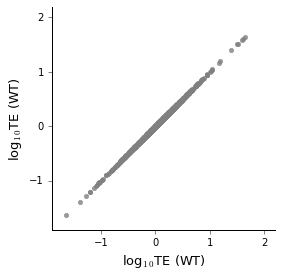

In [52]:
base_Normal_RP = 'ks57'
base_MS2_RP = 'ks61'
base_RNAseq = 'ks65'
Normal_RP = 'ks57'
MS2_RP = 'no'
RNAseq = 'ks65'
dotcolor='grey'
rpc_threshfold = 0.1

df_basecutoff = DFtoUSE(df_base_CDS,rpc_threshfold,base_Normal_RP,base_MS2_RP,base_RNAseq)
df_to_use = DFtoUSE(df_basecutoff,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['TE_'+base_Normal_RP+'/'+base_RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan).corr(df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan))

fig, ax = plt.subplots()
fig.set_size_inches(4, 4) 

ax = sns.regplot(x=df_to_use['TE_'+base_Normal_RP+'/'+base_RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 y=df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 fit_reg=False,
                 color=dotcolor)

ax.set_xlim(-1.9,2.2)
ax.set_ylim(-1.9,2.2)
plt.xticks([-1,0,1,2])
plt.yticks([-1,0,1,2])

plt.xlabel('log'+'$_1$'+'$_0$'+'TE (WT)', fontsize=13)
plt.ylabel('log'+'$_1$'+'$_0$'+'TE (WT)', fontsize=13)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

0.9508620848251247


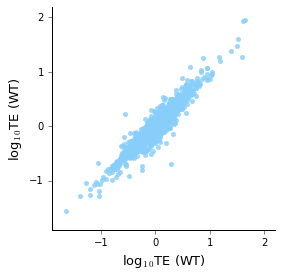

In [51]:
base_Normal_RP = 'ks57'
base_MS2_RP = 'ks61'
base_RNAseq = 'ks65'
Normal_RP = 'ks58'
MS2_RP = 'no'
RNAseq = 'ks66'
dotcolor='lightskyblue'
rpc_threshfold = 0.1

df_basecutoff = DFtoUSE(df_base_CDS,rpc_threshfold,base_Normal_RP,base_MS2_RP,base_RNAseq)
df_to_use = DFtoUSE(df_basecutoff,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['TE_'+base_Normal_RP+'/'+base_RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan).corr(df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan))

fig, ax = plt.subplots()
fig.set_size_inches(4, 4) 

ax = sns.regplot(x=df_to_use['TE_'+base_Normal_RP+'/'+base_RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 y=df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 fit_reg=False,
                 color=dotcolor)

ax.set_xlim(-1.9,2.2)
ax.set_ylim(-1.9,2.2)
plt.xticks([-1,0,1,2])
plt.yticks([-1,0,1,2])

plt.xlabel('log'+'$_1$'+'$_0$'+'TE (WT)', fontsize=13)
plt.ylabel('log'+'$_1$'+'$_0$'+'TE (WT)', fontsize=13)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

0.9390504675548543


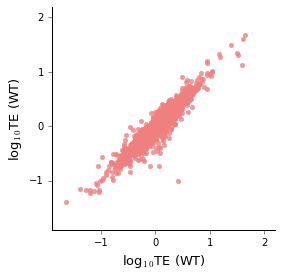

In [50]:
base_Normal_RP = 'ks57'
base_MS2_RP = 'ks61'
base_RNAseq = 'ks65'
Normal_RP = 'ks59'
MS2_RP = 'no'
RNAseq = 'ks67'
dotcolor='lightcoral'
rpc_threshfold = 0.1

df_basecutoff = DFtoUSE(df_base_CDS,rpc_threshfold,base_Normal_RP,base_MS2_RP,base_RNAseq)
df_to_use = DFtoUSE(df_basecutoff,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['TE_'+base_Normal_RP+'/'+base_RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan).corr(df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan))

fig, ax = plt.subplots()
fig.set_size_inches(4, 4) 

ax = sns.regplot(x=df_to_use['TE_'+base_Normal_RP+'/'+base_RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 y=df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 fit_reg=False,
                 color=dotcolor)

ax.set_xlim(-1.9,2.2)
ax.set_ylim(-1.9,2.2)
plt.xticks([-1,0,1,2])
plt.yticks([-1,0,1,2])

plt.xlabel('log'+'$_1$'+'$_0$'+'TE (WT)', fontsize=13)
plt.ylabel('log'+'$_1$'+'$_0$'+'TE (WT)', fontsize=13)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

0.9204692890844046


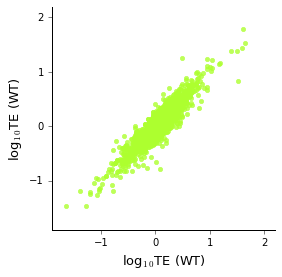

In [49]:
base_Normal_RP = 'ks57'
base_MS2_RP = 'ks61'
base_RNAseq = 'ks65'
Normal_RP = 'ks60'
MS2_RP = 'no'
RNAseq = 'ks68'
dotcolor='greenyellow'
rpc_threshfold = 0.1

df_basecutoff = DFtoUSE(df_base_CDS,rpc_threshfold,base_Normal_RP,base_MS2_RP,base_RNAseq)
df_to_use = DFtoUSE(df_basecutoff,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

print df_to_use['TE_'+base_Normal_RP+'/'+base_RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan).corr(df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan))

fig, ax = plt.subplots()
fig.set_size_inches(4, 4) 

ax = sns.regplot(x=df_to_use['TE_'+base_Normal_RP+'/'+base_RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 y=df_to_use['TE_'+Normal_RP+'/'+RNAseq].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                 fit_reg=False,
                 color=dotcolor)

ax.set_xlim(-1.9,2.2)
ax.set_ylim(-1.9,2.2)
plt.xticks([-1,0,1,2])
plt.yticks([-1,0,1,2])

plt.xlabel('log'+'$_1$'+'$_0$'+'TE (WT)', fontsize=13)
plt.ylabel('log'+'$_1$'+'$_0$'+'TE (WT)', fontsize=13)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()